In [1]:
import pandas as pd
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import seaborn as sns

# smoothing functions
def nonparam_smooth(y,smooth_type='savgol',window=21):
    if smooth_type=='savgol':
        y[~np.isnan(y)] = signal.savgol_filter(y[~np.isnan(y)],window,2)
    return y

def poly_smooth(x,y,deg):
    nanvals = np.isnan(y)
    pfit,cov = np.polyfit(x[~nanvals],y[~nanvals],deg, cov=True)
    yp = np.poly1d(pfit)(x)
    return yp,pfit,cov

In [2]:
# load data
DATADIR = ''
nfl_pbp = pd.read_csv(DATADIR + 'NFL_PbP_2009_2018_4thDownAnalysis.csv')

In [247]:
max_ytg = 16
play_type='punt'
plays = nfl_pbp[nfl_pbp.play_type == play_type]

punt_dist = np.zeros(99)
for yds in range(1, 100):
        punt_dist[yds-1] = np.mean(plays[plays.yardline_100==yds].kick_distance) - np.mean(plays[plays.yardline_100==yds].return_yards)

In [259]:
# parametric smooth
poly = poly_smooth(np.arange(1,100), punt_dist.copy(), deg=3)[0]
# nonparametric smooth
nonparam = nonparam_smooth(punt_dist.copy(), window=21)

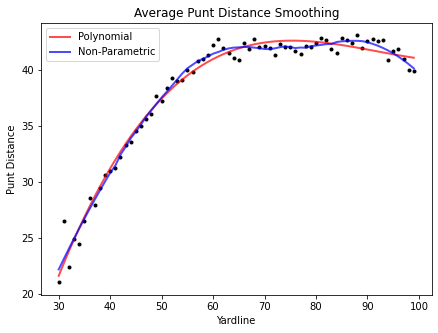

In [262]:
xmax = 100
plt.figure(figsize=(7,5))
plt.plot(range(30,xmax),punt_dist[29:],'o', c='black', ms=3)
plt.plot(range(30,xmax),poly[29:],'-', c='red', lw=2, alpha=0.7, label='Polynomial')
plt.plot(range(30,xmax),nonparam[29:],'-', c='blue', lw=2, alpha=0.7, label='Non-Parametric')
plt.legend()
plt.xlabel('Yardline')
plt.ylabel('Punt Distance')
plt.title('Average Punt Distance Smoothing')
# plt.show()
plt.savefig('smoothing/punt_dist.png')